# import

In [1]:
import pandas as pd
from tqdm.notebook import tqdm as tqdm
import requests
from bs4 import BeautifulSoup
import re
import time
import urllib.request
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score,roc_curve, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import average_precision_score
import numpy as np
import matplotlib.pyplot as plt
from graphviz import *
from sklearn.preprocessing import LabelEncoder


# def load data

In [2]:
def load_csv(load_path):
    df = pd.read_csv(load_path, index_col=0)
    return df

# load return table

In [4]:
return_table = load_csv(path_ubu+'returns_2021.csv')
return_table.head()

# load peds

In [118]:
horse_id_list

In [24]:
peds = load_csv(path_2021+'peds_2021.csv')
sample = peds
sample.iloc[0]

peds_0                    ダイワメジャー 2001 栗毛 [血統][産駒] Halo系
peds_1                 カシュカシュ 2009 鹿毛 [血統][産駒] FNo.[1-k]
peds_2     サンデーサイレンス Sunday Silence(米) 1986 青鹿毛 [血統][産駒]
peds_3                        スカーレットブーケ 1988 栗毛 [血統][産駒]
peds_4                  アフリート Afleet(加) 1984 栗毛 [血統][産駒]
                               ...                      
peds_57                                        Almahmoud
peds_58                                       Bold Ruler
peds_59                                   Somethingroyal
peds_60                                          Lyphard
peds_61                                      Three Roses
Name: 2018105875, Length: 62, dtype: object

# path ubuntu

In [21]:
path_ubu = '/home/hipro/デスクトップ/Horse/Data/2021/'

In [4]:
df_2021 = load_csv(path_ubu+'race_2021results.csv')

# path_

In [5]:
path_2021 = '/Users/rince/Desktop/Horse/Data/2021/'

In [6]:
df_2021 = load_csv(path_2021+'race_2021results.csv')
df_2021

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師,course_len,weather,race_type,ground_state,date,horse_id,jockey_id
202101010101,1,5,9,ディーバサンライズ,牝3,52.0,秋山稔樹,1:08.7,NaN,13.5,7.0,474(-22),[西] 小林真也,1200,小雨,芝,良,2021年6月12日,2018105875,1181
202101010101,2,3,6,バンベルク,牡3,56.0,横山和生,1:08.8,3/4,3.9,2.0,470(-2),[西] 安田隆行,1200,小雨,芝,良,2021年6月12日,2018105258,1140
202101010101,3,7,14,リツィタル,牝3,54.0,大野拓弥,1:08.9,1/2,124.7,14.0,394(+2),[西] 牧田和弥,1200,小雨,芝,良,2021年6月12日,2018101134,1096
202101010101,4,5,10,クレマチステソーロ,牝3,54.0,鮫島克駿,1:09.0,1/2,7.6,5.0,468(+2),[東] 高木登,1200,小雨,芝,良,2021年6月12日,2018102791,1157
202101010101,5,3,5,ペイシャケイティー,牝3,54.0,古川吉洋,1:09.0,ハナ,7.5,4.0,456(+8),[東] 土田稔,1200,小雨,芝,良,2021年6月12日,2018101539,1015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202110040412,4,3,3,アスターナランハ,牡3,54.0,国分優作,1:50.8,ハナ,7.6,4.0,462(+2),[西] 南井克巳,1800,雨,芝,重,2021年8月22日,2018106219,1125
202110040412,5,2,2,エスポワールミノル,牡4,57.0,藤岡康太,1:50.9,3/4,13.4,5.0,524(0),[西] 野中賢二,1800,雨,芝,重,2021年8月22日,2017104082,1116
202110040412,6,8,8,イーベンホルツ,牡4,57.0,和田竜二,1:51.3,2.1/2,34.8,6.0,488(+1),[西] 村山明,1800,雨,芝,重,2021年8月22日,2017104699,1018
202110040412,7,6,6,ラヴベローナ,牝6,55.0,岩田望来,1:51.6,2,99.2,8.0,470(-6),[西] 羽月友彦,1800,雨,芝,重,2021年8月22日,2015100557,1174


In [12]:
race_data

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,sex,old,rank,weight,weight_diff,tansyou,ninki
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,2016104451,1170,1,5,7,504,4,16.0,7
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,2018102331,1093,1,3,4,462,-4,17.2,6
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,2018101178,1154,1,3,3,458,-6,10.7,5
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,2018106492,666,1,3,2,472,6,1.7,1
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,2018106211,1130,1,3,1,500,2,7.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202104040408,7,8,54.0,2400,3,0,1,2021-08-22,2018100545,1122,1,3,6,474,0,7.2,3
202104040408,7,9,54.0,2400,3,0,1,2021-08-22,2017101556,1183,1,4,5,488,4,38.6,8
202104040408,6,7,54.0,2400,3,0,1,2021-08-22,2018104628,1171,1,3,4,478,10,16.7,6
202104040409,1,2,55.0,1000,3,0,1,2021-08-22,2017106172,1077,0,4,11,408,-4,22.7,7


In [217]:
print(horse_results.columns)
horse_results.head()

Index(['日付', '開催', '天気', 'R', 'レース名', '映像', '頭数', '枠番', '馬番', 'オッズ', '人気',
       '着順', '騎手', '斤量', '距離', '馬場', '馬場指数', 'タイム', '着差', 'ﾀｲﾑ指数', '通過', 'ペース',
       '上り', '馬体重', '厩舎ｺﾒﾝﾄ', '備考', '勝ち馬(2着馬)', '賞金'],
      dtype='object')


,日付,開催,天気,R,レース名,映像,頭数,枠番,馬番,オッズ,...,着差,ﾀｲﾑ指数,通過,ペース,上り,馬体重,厩舎ｺﾒﾝﾄ,備考,勝ち馬(2着馬),賞金
2018105875,2021/07/04,1函館2,曇,9.0,3歳以上1勝クラス,NaN,16,3.0,5,7.3,...,-0.4,**,5-4,33.2-35.2,34.7,474(0),NaN,NaN,(メイショウハボタン),760.0
2018105875,2021/06/12,1札幌1,小雨,1.0,3歳未勝利,NaN,16,5.0,9,13.5,...,-0.1,**,4-4,33.8-34.9,34.6,474(-22),NaN,NaN,(バンベルク),510.0
2018105875,2021/04/10,1新潟1,晴,5.0,3歳未勝利,NaN,16,8.0,16,13.7,...,0.6,**,3-3,34.9-34.9,35.2,496(0),NaN,NaN,プラチナムレイアー,NaN
2018105258,2021/08/29,2札幌6,晴,2.0,3歳未勝利,NaN,12,1.0,1,3.2,...,0.2,**,8-6,35.4-35.9,35.5,466(+2),NaN,NaN,スペシャリティ,130.0
2018105258,2021/07/11,1函館4,曇,2.0,3歳未勝利,NaN,16,6.0,11,1.7,...,0.8,**,2-2,34.1-36.0,36.7,464(-6),NaN,NaN,ジュノエスク,NaN


# class HorseResults

In [34]:
class HorseResults():
    
    
    def __init__(self, horse_results):
        self.horse_results = horse_results[['日付','着順','賞金']]
        self.process()
       
        
    
    def process(self):
        df_processed = self.horse_results.copy()
        df_processed['rank'] = pd.to_numeric(df_processed['着順'],errors='coerce')
        df_processed.dropna(subset=['rank'],inplace=True)
        df_processed['rank'] = df_processed['rank'].astype(int)
        df_processed['date'] = pd.to_datetime(df_processed['日付'])
        df_processed['prize'] = df_processed['賞金']
        df_processed['prize'].fillna(0, inplace=True)
        df_processed = df_processed.drop(['日付','着順','賞金'],axis=1)
        self.horse_results = df_processed

    
    def average(self, horse_id_list, date, n_samples='all'):
        target_df = self.horse_results.query('index in @horse_id_list')
        
        if n_samples=='all':
            filtered_df = target_df[target_df['date']<date]
        elif n_samples>0:
            filtered_df = target_df[target_df['date']<date].sort_values('date', ascending=False).groupby(level=0).head(n_samples)
        else:
            raise Exception('n_samples must be positive number.')
            
        average = filtered_df.groupby(level=0)[['rank','prize']].mean()
        
        return average.rename(columns={'rank':'rank_{}R'.format(n_samples) ,'prize':'prize_{}R'.format(n_samples)})
    
    
    def merge(self, results, date, n_samples='all'):
        df = results[results['date']==date]
        horse_id_list = df['horse_id']
        merged_df = df.merge(self.average(horse_id_list,date,n_samples),left_on='horse_id',right_index=True,how='left')
        return merged_df
    
    
    def merge_all(self, results, n_samples='all'):
        date_list = results['date'].unique()
        merged_df = pd.concat([self.merge(results,date,n_samples) for date in date_list])
        return merged_df

# class Scrape_table

In [136]:
class ShutubaTable(DataProcessor):
    
    
    def __init__(self):
        super(ShutubaTable,self).__init__()
        
    def scrape(self, race_id_list, date):
        for race_id in race_id_list:
        
            url = 'https://race.netkeiba.com/race/shutuba.html?race_id=' + race_id
            df = pd.read_html(url)[0]
            df = df.T.reset_index(level=0, drop=True).T

            html = requests.get(url)
            html.encoding = "EUC-JP"
            soup = BeautifulSoup(html.text, "html.parser")

            texts = soup.find('div', attrs={'class':'RaceData01'}).text
            texts = re.findall(r'\w+',texts)
            for text in texts:
                if 'm' in text:
                    df['course_len'] = [int(re.findall(r'\d+',text)[0])] * len(df)
                if text in ["曇", "晴", "雨", "小雨", "小雪", "雪"]:
                    df['weather'] = [text] * len(df)
                if text in ["良","稍重","重","不良"]:
                    df['ground_state'] = [text] * len(df)
                if '不' in text:
                    df['ground_state'] = ['不良'] * len(df)
                if '芝' in text:
                    df['race_type'] = ['芝'] * len(df)
                if '障' in text:
                    df['race_type'] = ['障害'] * len(df)
                if 'ダ' in text:
                    df['race_type'] = ['ダート'] * len(df)
            df['date'] = [date] * len(df)

            horse_id_list = []
            horse_td_list = soup.find_all("td", attrs={'class':'HorseInfo'})
            for td in horse_td_list:
                horse_id = re.findall(r'\d+', td.find('a')['href'])[0]
                horse_id_list.append(horse_id)

            jockey_id_list = []
            jockey_td_list = soup.find_all("td", attrs={'class':'Jockey'})
            for td in jockey_td_list:
                jockey_id = re.findall(r'\d+', td.find('a')['href'])[0]
                jockey_id_list.append(horse_id)

            df['horse_id'] = horse_id_list
            df['jockey_id'] = jockey_id_list

            df.index = [race_id] * len(df)
            self.data = self.data.append(df)
                
                       
    def preprocessing(self):
        df = self.data.copy()
        df['horse_id'] = df['horse_id'].astype(int)
        df['jockey_id'] = df['jockey_id'].astype(int)
        df['性'] = df['性齢'].map(lambda x:str(x)[0])
        df['年齢'] = df['性齢'].map(lambda x:str(x)[1:]).astype(int)
        
        df = df[df["馬体重(増減)"]!='--']
        df['体重'] = df['馬体重(増減)'].str.split("(",expand=True)[0].astype(int)
        df['体重変化'] = df['馬体重(増減)'].str.split("(",expand=True)[1].str[:-1].astype(int)
        df['date'] = pd.to_datetime(df['date'])
        
        df['枠'] = df['枠'].astype(int)
        df['馬番'] = df['馬番'].astype(int)
        df['斤量'] = df['斤量'].astype(int)
        
        df = df[['枠','馬番','斤量','course_len','weather','race_type',
                'ground_state','date','horse_id','jockey_id','性','年齢','体重','体重変化']]
        
        self.data_p = df.rename(columns={'枠':'枠番'})
            
   
    def process_categorical(self,le_horse, le_jockey):
        df = self.data_pe.copy()
        
        mask_horse = df['horse_id'].isin(le_horse.classes_)
        new_horse_id = df['horse_id'].mask(mask_horse).dropna().unique()
        le_horse.classes_ = np.concatenate([le_horse.classes_, new_horse_id])
        df['horse_id'] = le_horse.transform(df['horse_id'])
        
        
        mask_jockey = df['jockey_id'].isin(le_jockey.classes_)
        new_jockey_id = df['jockey_id'].mask(mask_jockey).dropna().unique()
        le_jockey.classes_ = np.concatenate([le_jockey.classes_, new_jockey_id])
        df['jockey_id'] = le_jockey.transform(df['jockey_id'])
        
        df['horse_id'] = df['horse_id'].astype('category')
        df['jockey_id'] = df['jockey_id'].astype('category')
                                               
        self.data_c = df
        

# class Peds

In [115]:
class Peds():
    
    
    def __init__(self,peds):
        self.peds = peds
        
        
    def encode(self):
        df = self.peds.copy()
        for column in df.columns:
            df[column] = LabelEncoder().fit_transform(df[column].fillna('Na'))
       
        self.peds_e = df.astype('category')

# class DataProcessor

In [116]:
class DataProcessor():
    
    
    def __init__(self):
        self.data = pd.DataFrame()
        self.data_p = pd.DataFrame()
        self.data_h = pd.DataFrame()
        self.data_pe = pd.DataFrame()
        self.data_c = pd.DataFrame()
        
        
    def merge_horse_results(self, hr, n_samples_list=[5,9, 'all']):
        self.data_h = self.data_p.copy()
        for n_samples in n_samples_list:
            self.data_h = hr.merge_all(self.data_h,n_samples=n_samples)
        
        
    def merge_peds(self,peds):
        self.data_pe = self.data_h.merge(peds, left_on='horse_id',right_index=True,how='left')
        self.no_peds = self.data_pe[self.data_pe['peds_0'].isnull()]['horse_id'].unique()
        if len(self.no_peds) > 0:
            print('scrape peds at horse_id_list "no_peds" ')
            
            
    def process_categorical(self,le_horse, le_jockey):
        df = self.data_pe.copy()
        
        mask_horse = df['horse_id'].isin(le_horse.classes_)
        new_horse_id = df['horse_id'].mask(mask_horse).dropna().unique()
        le_horse.classes_ = np.concatenate([le_horse.classes_, new_horse_id])
        df['horse_id'] = le_horse.transform(df['horse_id'])
        
        
        mask_jockey = df['jockey_id'].isin(le_jockey.classes_)
        new_jockey_id = df['jockey_id'].mask(mask_jockey).dropna().unique()
        le_jockey.classes_ = np.concatenate([le_jockey.classes_, new_jockey_id])
        df['jockey_id'] = le_jockey.transform(df['jockey_id'])
        
        df['horse_id'] = df['horse_id'].astype('category')
        df['jockey_id'] = df['jockey_id'].astype('category')
                                               
        self.data_c = df

# class Results

In [126]:
class Results(DataProcessor):
    
    
    def __init__(self, results):
        super(Results,self).__init__()
        self.data = results
                           
    def preprocessing(self):
        df = self.data.copy()
        df['date'] = pd.to_datetime(df['date'],format='%Y年%m月%d日')
        df.sort_values('date', ascending=True,inplace=True)
        df['sex'] = df['性齢'].map(lambda x: str(x)[0])
        df['old'] = df['性齢'].map(lambda x: str(x)[1]).astype(int)
        df = df[~(df['着順'].astype(str).str.contains('\D'))]
        df['rank'] = df['着順'].astype(int).map(lambda x:1 if x<4 else 0)
        
        df['weight'] = df['馬体重'].str.split('(', expand=True)[0].astype(int)
        df['weight_diff'] = df['馬体重'].str.split('(', expand=True)[1].str[:-1].astype(int)
        df['tansyou'] = df['単勝'].astype(float)
        df['ninki'] = df['人気'].astype(int)
        df = df.drop(['馬名','着差','騎手','調教師','性齢','着順','馬体重','単勝','人気','タイム'],axis=1)
        df = df.rename(columns={'着順':'rank','枠番':'wakuban','馬番':'umaban','斤量':'kinryou'})
#         雪, 小雪もあるでよ
        df['weather'] = df['weather'].map({'小雨':0, '雨':1,'曇':2, '晴':3})
        df['race_type'] = df['race_type'].map({'芝':0, 'ダート':1, '障害':2})
        df['sex'] = df['sex'].map({'牝':0, '牡':1, 'セ':2})
        df['ground_state'] = df['ground_state'].map({'良':0, '稍重':1, '重':2, '不良':3})

        self.data_p = df
            
            
    def process_categorical(self):
        self.le_horse = LabelEncoder().fit(self.data_pe['horse_id'])
        self.le_jockey = LabelEncoder().fit(self.data_pe['jockey_id'])
        super().process_categorical(self.le_horse,self.le_jockey)

In [86]:
p = Peds(peds)
p.encode()
p.peds_e
df_2021.head()

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師,course_len,weather,race_type,ground_state,date,horse_id,jockey_id
202101010101,1,5,9,ディーバサンライズ,牝3,52.0,秋山稔樹,1:08.7,NaN,13.5,7.0,474(-22),[西] 小林真也,1200,小雨,芝,良,2021年6月12日,2018105875,1181
202101010101,2,3,6,バンベルク,牡3,56.0,横山和生,1:08.8,3/4,3.9,2.0,470(-2),[西] 安田隆行,1200,小雨,芝,良,2021年6月12日,2018105258,1140
202101010101,3,7,14,リツィタル,牝3,54.0,大野拓弥,1:08.9,1/2,124.7,14.0,394(+2),[西] 牧田和弥,1200,小雨,芝,良,2021年6月12日,2018101134,1096
202101010101,4,5,10,クレマチステソーロ,牝3,54.0,鮫島克駿,1:09.0,1/2,7.6,5.0,468(+2),[東] 高木登,1200,小雨,芝,良,2021年6月12日,2018102791,1157
202101010101,5,3,5,ペイシャケイティー,牝3,54.0,古川吉洋,1:09.0,ハナ,7.5,4.0,456(+8),[東] 土田稔,1200,小雨,芝,良,2021年6月12日,2018101539,1015


In [127]:
r_ = Results(df_2021)
r_.preprocessing()
r_.data_p.head()
r_.merge_horse_results(hr)
r_.data_h.head()
r_.merge_peds(p.peds_e)
r_.data_pe.head()

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,2016104451,1170,...,27,584,61,52,421,486,260,505,1013,2784
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,2018102331,1093,...,337,233,61,52,421,486,249,789,682,1732
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,2018101178,1154,...,140,645,119,108,427,270,298,947,434,446
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,2018106492,666,...,422,635,62,14,67,490,260,1010,201,1557
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,2018106211,1130,...,422,635,106,111,125,527,333,73,575,151


In [128]:
r_.process_categorical()
r_.data_c.head()

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,1736,112,...,27,584,61,52,421,486,260,505,1013,2784
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,5017,52,...,337,233,61,52,421,486,249,789,682,1732
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,4372,97,...,140,645,119,108,427,270,298,947,434,446
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,7621,5,...,422,635,62,14,67,490,260,1010,201,1557
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,7442,78,...,422,635,106,111,125,527,333,73,575,151


# メモ
results\
preprocessing()\
results_p\
hr.merge_all()\
results_h\
pd.merge()\
results_pe\


# メモ
st.shutuba_table\
st.preprocessing()\
st.shutuba_table_p\
st.merge_horse_results()\
st.merge_peds()\
st.shutuba_table_pe\
st.process_categorical

In [61]:
results_m = results_5R.merge(peds, left_on='horse_id',right_index=True,how='left')
results_m.head()


,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,2016104451,1170,...,Blakeney,The Dancer,Hail to Reason,Cosmah,Understanding,Mountain Flower,Northern Dancer,Lady Victoria,ガーサント,パロクサイド
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,2018102331,1093,...,Tri Jet,Hail Proudly,Hail to Reason,Cosmah,Understanding,Mountain Flower,Never Bend,River Lady,Ribot,Rajput Princess
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,2018101178,1154,...,Icecapade,コレラ,Raise a Native,Gold Digger,Venetian Jester,Friendly Ways,Raise a Native,Sweet Tooth,King of the Tudors,Countess Fleet
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,2018106492,666,...,リマンド,イコマエイカン,Halo,Ballade,Caerleon,Muffitys,Northern Dancer,Victoria Regina,Damascus,Pass all Flags
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,2018106211,1130,...,リマンド,イコマエイカン,Northern Dancer,Goofed,Drone,Olmec,Sharpen Up,Ballinderry,Northern Dancer,Ballade


In [80]:
st.shutuba_table_h
10000/800

12.5

In [137]:
st = ShutubaTable()
st.scrape(['202004020601','202004020605'],'2020/08/09')
st.preprocessing()
st.data

,枠,馬番,印,馬名,性齢,斤量,騎手,厩舎,馬体重(増減),Unnamed: 9_level_1,人気,登録,メモ,course_len,race_type,weather,ground_state,date,horse_id,jockey_id
202004020601,1,1,NaN,アルバトリア,牝2,51.0,小林脩,美浦小桧山,422(-2),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018102805,2018102130
202004020601,1,2,NaN,レースアルカーナ,牝2,54.0,国分優,栗東梅田,452(-2),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018102165,2018102130
202004020601,2,3,NaN,トーセンマーク,牡2,54.0,武藤,美浦古賀慎,502(-6),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018105670,2018102130
202004020601,2,4,NaN,アイリッシュムーン,牝2,54.0,福永,美浦武井,462(+4),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018102090,2018102130
202004020601,3,5,NaN,スウィートブルーム,牝2,54.0,柴田大,美浦和田雄,422(0),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018102131,2018102130
202004020601,3,6,NaN,サンキューベイリー,牝2,53.0,岩田望,美浦相沢,468(-8),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018101443,2018102130
202004020601,4,7,NaN,グローリアスカペラ,牝2,54.0,Ｍデムーロ,美浦土田,504(0),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018101804,2018102130
202004020601,4,8,NaN,ミエノピュア,牡2,54.0,鮫島駿,栗東高橋亮,488(-4),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018104106,2018102130
202004020601,5,9,NaN,ミヤジオシャラク,牝2,54.0,和田竜,栗東川村,484(+4),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018103769,2018102130
202004020601,5,10,NaN,タカノアメージング,牡2,54.0,荻野極,栗東北出,490(+2),---.-,**,NaN,NaN,1800,芝,雨,不良,2020/08/09,2018103175,2018102130


In [138]:
st.merge_horse_results(hr)
st.data_h.head()

,枠番,馬番,斤量,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,性,年齢,体重,体重変化,rank_5R,prize_5R,rank_9R,prize_9R,rank_allR,prize_allR
202004020601,1,1,51,1800,雨,芝,不良,2020-08-09,2018102805,2018102130,牝,2,422,-2,4.0,92.333333,4.0,92.333333,4.0,92.333333
202004020601,1,2,54,1800,雨,芝,不良,2020-08-09,2018102165,2018102130,牝,2,452,-2,4.0,110.000000,4.0,110.000000,4.0,110.000000
202004020601,2,3,54,1800,雨,芝,不良,2020-08-09,2018105670,2018102130,牡,2,502,-6,5.0,70.000000,5.0,70.000000,5.0,70.000000
202004020601,2,4,54,1800,雨,芝,不良,2020-08-09,2018102090,2018102130,牝,2,462,4,5.0,70.000000,5.0,70.000000,5.0,70.000000
202004020601,3,5,54,1800,雨,芝,不良,2020-08-09,2018102131,2018102130,牝,2,422,0,3.0,180.000000,3.0,180.000000,3.0,180.000000


In [139]:
st.merge_peds(p.peds_e)
st.data_pe.head()


scrape peds at horse_id_list "no_peds" 


,枠番,馬番,斤量,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202004020601,1,1,51,1800,雨,芝,不良,2020-08-09,2018102805,2018102130,...,283,519,121,275,246,631,260,686,453,2170
202004020601,1,2,54,1800,雨,芝,不良,2020-08-09,2018102165,2018102130,...,127,570,106,169,450,865,458,1104,1188,2492
202004020601,2,3,54,1800,雨,芝,不良,2020-08-09,2018105670,2018102130,...,337,233,74,304,176,576,249,792,1145,2780
202004020601,2,4,54,1800,雨,芝,不良,2020-08-09,2018102090,2018102130,...,181,274,106,234,166,607,329,1022,272,1308
202004020601,3,5,54,1800,雨,芝,不良,2020-08-09,2018102131,2018102130,...,51,480,194,192,59,430,232,573,443,768


In [141]:
# le_jockey = LabelEncoder().fit(results_m['jockey_id'])
# le_horse = LabelEncoder().fit(results_m['horse_id'])
st.process_categorical(r_.le_horse,r_.le_jockey)
st.data_c.head()

,枠番,馬番,斤量,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202004020601,1,1,51,1800,雨,芝,不良,2020-08-09,5250,144,...,283,519,121,275,246,631,260,686,453,2170
202004020601,1,2,54,1800,雨,芝,不良,2020-08-09,4913,144,...,127,570,106,169,450,865,458,1104,1188,2492
202004020601,2,3,54,1800,雨,芝,不良,2020-08-09,7161,144,...,337,233,74,304,176,576,249,792,1145,2780
202004020601,2,4,54,1800,雨,芝,不良,2020-08-09,4864,144,...,181,274,106,234,166,607,329,1022,272,1308
202004020601,3,5,54,1800,雨,芝,不良,2020-08-09,4888,144,...,51,480,194,192,59,430,232,573,443,768


In [66]:
st.shutuba_table_c
pd.Categorical

,枠番,馬番,斤量,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202004020601,1,1,51,1800,雨,芝,不良,2020-08-09,5250,144,...,Sassafras,Sensibility,Red God,Runaway Bride,Mill Reef,Riverside,Northern Dancer,Pas de Nom,Le Fabuleux,The Bride
202004020601,1,2,54,1800,雨,芝,不良,2020-08-09,4913,144,...,Hasty Road,Sunny Vale,Northern Dancer,Lady Victoria,エルセンタウロ,ディープデイーン,デュール,フラワースウイース,フラッシュライト,グランドトウキヨウ
202004020601,2,3,54,1800,雨,芝,不良,2020-08-09,7161,144,...,Tri Jet,Hail Proudly,Kalamoun,State Pension,Hornbeam,Priddy Fair,Never Bend,Roman Song,ハイハット,バンバレラ
202004020601,2,4,54,1800,雨,芝,不良,2020-08-09,4864,144,...,Lucky Mel,Incantation,Northern Dancer,Pas de Nom,Halo,Ramhyde,Seattle Slew,Weekend Surprise,Fappiano,Minstress
202004020601,3,5,54,1800,雨,芝,不良,2020-08-09,4888,144,...,Clandestine,Retirement,ベリファ,Miss Carina,Breton,Lutine,Mr. Prospector,Miesque,Kris,Gabina
202004020601,3,6,53,1800,雨,芝,不良,2020-08-09,4500,144,...,Gallant Man,Europa,Northern Dancer,Fleur,On Your Mark,Noble Joan,Royal Charger,Portage,Pieces of Eight,Sweet Solera
202004020601,4,7,54,1800,雨,芝,不良,2020-08-09,4696,144,...,Crimson Satan,Consentida,Vice Regent,Mint Copy,Hold Your Peace,Laredo Lass,Mill Reef,Thereby,ノーザンテースト,シヤダイプリマ
202004020601,4,8,54,1800,雨,芝,不良,2020-08-09,6000,144,...,Tri Jet,Sailaway,Bold Reasoning,My Charmer,Secretariat,Lassie Dear,Mr. Prospector,Con Game,White Gloves,Fleet Needles
202004020601,5,9,54,1800,雨,芝,不良,2020-08-09,5809,144,...,Ambiopoise,One Clear Call,Hail to Reason,Cosmah,Understanding,Mountain Flower,Nearctic,Natalma,Tom Fool,Brazen
202004020601,5,10,54,1800,雨,芝,不良,2020-08-09,5468,144,...,New Providence,Shining Sun,Nearctic,Natalma,Bull Page,Flaring Top,Nigromante,Candy Dish,Our Colonel,Mademoiselle d'Or


In [33]:
hr = HorseResults(horse_results)
# hr.horse_results
# results_5R = hr.merge_all(results_p, n_samples=5)
# results_5R.head()
# test = hr.average(horse_id_list,)

---------------------
AUC train: 0.8290348014786995
AUC test : 0.7949908027617012
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      4844
           1       0.41      0.74      0.53      1371

    accuracy                           0.71      6215
   macro avg       0.66      0.72      0.66      6215
weighted avg       0.80      0.71      0.73      6215

        features  importances
13       tansyou     0.622569
14         ninki     0.087558
16      prize_5R     0.032480
7       horse_id     0.030653
1         umaban     0.029527
9            sex     0.028689
2        kinryou     0.027882
8      jockey_id     0.025341
3     course_len     0.024857
12   weight_diff     0.024449
11        weight     0.024322
15       rank_5R     0.021880
0        wakuban     0.019793
6   ground_state     0.000000
5      race_type     0.000000
10           old     0.000000
4        weather     0.000000


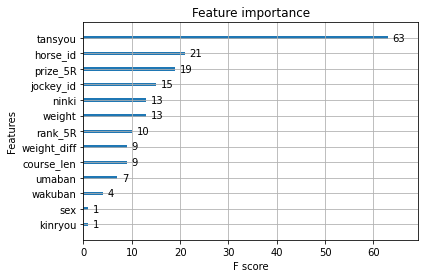

In [77]:

# pp = Preprocess(df_2021)
# race_data = pp.process()
# tmp = pd.get_dummies(race_data)

x_ = results_5R.drop(['rank','date'],axis=1)
y_ = results_5R['rank'].map(lambda x: 1 if x<4 else 0)

test_rate = int(0.8*len(x_))
x_train, x_test = x_.iloc[:test_rate],x_.iloc[test_rate:]
y_train, y_test = y_.iloc[:test_rate],y_.iloc[test_rate:]

rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

xgb_model, y_pred = xgb_pred(x_resampled, y_resampled, x_test, y_test)


# PlayGround

In [27]:
return_table
race_id_list = x_test.index.unique()
return_table.head()

,0,1,2,3
202101010101,単勝,9,1350,7
202101010101,複勝,9br6br14,"340br170br2,190",7br1br14
202101010101,枠連,3 - 5,660,2
202101010101,馬連,6 - 9,2580,13
202101010101,ワイド,6 - 9br9 - 14br6 - 14,"1,040br14,560br6,440",14br77br47


In [86]:
xgb_model.predict_proba(x_test)[:,1]

array([0.19020995, 0.7957776 , 0.40480846, ..., 0.5658107 , 0.3982204 ,
       0.40635103], dtype=float32)

# class Return

In [131]:
class Return():
    
    def __init__(self, return_tables):
        self.return_tables = return_tables
        self.return_tables.columns = self.return_tables.columns.astype(int)
        
    @property
    def fukusho(self):
        fukusho = self.return_tables[self.return_tables[0]=='複勝'][[1,2]] 
        wins = fukusho[1].str.split('br',expand=True).drop([3],axis=1)
        wins.columns = ['wins_0','wins_1','wins_2']
        returns = fukusho[2].str.split('br',expand=True).drop([3],axis=1)
        returns.columns = ['returns_0','returns_1','returns_2']
        df = pd.concat([wins,returns], axis=1)
        for column in df.columns:
            df[column] = df[column].str.replace(',','')
        
        return df.fillna(0).astype(int)
    
    
    @property 
    def tansho(self):
        tansho = self.return_tables[self.return_tables[0]=='単勝'][[1,2]] 
        tansho.columns = ['win','return']
        for column in tansho.columns:
            tansho[column] = pd.to_numeric(tansho[column], errors='coerce')
        return  tansho

In [134]:
# rt = Return(return_table)
# rt.fuk
rt = Return(return_tables)
rt.tansho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 202101010101 to 202110040412
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   win     2249 non-null   float64
 1   return  2249 non-null   float64
dtypes: float64(2)
memory usage: 52.9 KB


In [78]:
x_resampled

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,horse_id,jockey_id,sex,old,weight,weight_diff,tansyou,ninki,rank_5R,prize_5R
0,2,3,56.0,2000,3,0,0,2018106357,1154,1,3,472,-2,6.9,4,6.500000,25.500000
1,2,2,54.0,1700,3,1,1,2018103050,1126,0,3,416,-6,5.4,3,5.000000,60.000000
2,6,8,57.0,1800,3,1,0,2016103289,5525,1,5,520,4,21.7,9,6.400000,52.000000
3,6,12,55.0,1400,3,0,0,2017106417,660,0,4,394,-2,20.7,5,4.200000,227.200000
4,4,6,55.0,1400,3,1,0,2017104977,1128,0,4,480,-4,19.6,7,8.800000,14.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,4,4,54.0,1800,0,0,0,2019101070,1029,1,2,438,-4,3.1,2,5.000000,70.000000
10802,6,6,54.0,1700,2,1,0,2018102060,1014,1,3,510,6,1.4,1,2.333333,510.333333
10803,8,15,54.0,1200,0,0,0,2018103512,1162,0,3,410,6,6.9,3,8.000000,0.000000
10804,2,3,51.0,1200,0,0,0,2018104109,1188,0,3,442,-12,2.8,1,5.600000,62.000000


# class ModelEvaluater

In [214]:
class ModelEvaluater():
    
    
    def __init__(self, model, return_tables,std=True):
        self.model = model
        self.fukusho = Return(return_tables).fukusho
        self.tansho = Return(return_tables).tansho
        self.std = std
        
    def predict_proba(self, x_):
        proba = pd.Series(self.model.predict_proba(x_)[:,1],index=x_.index)
        if self.std:
            standard_scaler = lambda x: (x -x.mean())/x.std()
            proba = proba.groupby(level=0).transform(standard_scaler)
            proba = (proba - proba.min())/(proba.max() - proba.min())
            
        return proba
        
    def predict(self,x_, threshold=0.5):
        y_pred = self.predict_proba(x_)
        return [0 if p<threshold else 1 for p in y_pred]
        
        
    def pred_table(self, x_, threshold=0.5, bet_only=True):
        pred_table = x_.copy()[['umaban']]
        pred_table['pred'] = self.predict(x_,threshold)
        if bet_only:
            return pred_table[pred_table['pred']==1]['umaban']
        else:
            return pred_table
        
        
    def fukusho_return(self,x_,threshold=0.5):
        pred_table = self.pred_table(x_, threshold)
        n_bets = len(pred_table)
        money = -100*n_bets
        df = self.fukusho.copy()
        df = df.merge(pred_table,left_index=True, right_index=True,how='right')
        for i in range(3):
            money += df[df['wins_{}'.format(i)]==df['umaban']]['returns_{}'.format(i)].sum()
        
        return n_bets, money
    
    def tansho_return(self,x_,threshold=0.5):
        pred_table = self.pred_table(x_, threshold)
        n_bets = len(pred_table)
        money = -100*n_bets
        df = self.tansho.copy()
        df = df.merge(pred_table,left_index=True, right_index=True,how='right')
        money += df[df['win']==df['umaban']]['return'].sum()
        return n_bets, money
    
        

In [104]:
# xgb_model
me = ModelEvaluater(model=xgb_model,return_tables=return_tables)
sample = me.calculate_return(x_test)
sample

(2503, -51570)

# class Preprocess

In [11]:
class Preprocess():
    
    
    def __init__(self, df_race_results):
        self.df_race_results = df_race_results
        
        
    def process(self):
        df_processed = self.df_race_results.copy()
        df_processed['date'] = pd.to_datetime(df_processed['date'],format='%Y年%m月%d日')
        df_processed.sort_values('date', ascending=True,inplace=True)
        df_processed['sex'] = df_processed['性齢'].map(lambda x: str(x)[0])
        df_processed['old'] = df_processed['性齢'].map(lambda x: str(x)[1]).astype(int)
        df_processed = df_processed[~(df_processed['着順'].astype(str).str.contains('\D'))]
        df_processed['rank'] = df_processed['着順'].astype(int)
        df_processed['weight'] = df_processed['馬体重'].str.split('(', expand=True)[0].astype(int)
        df_processed['weight_diff'] = df_processed['馬体重'].str.split('(', expand=True)[1].str[:-1].astype(int)
        df_processed['tansyou'] = df_processed['単勝'].astype(float)
        df_processed['ninki'] = df_processed['人気'].astype(int)
        df_processed = df_processed.drop(['馬名','着差','騎手','調教師','性齢','着順','馬体重','単勝','人気','タイム'],axis=1)
        df_processed = df_processed.rename(columns={'着順':'rank','枠番':'wakuban','馬番':'umaban','斤量':'kinryou'})
#         雪, 小雪もあるでよ
        df_processed['weather'] = df_processed['weather'].map({'小雨':0, '雨':1,'曇':2, '晴':3})
        df_processed['race_type'] = df_processed['race_type'].map({'芝':0, 'ダート':1, '障害':2})
        df_processed['sex'] = df_processed['sex'].map({'牝':0, '牡':1, 'セ':2})
        df_processed['ground_state'] = df_processed['ground_state'].map({'良':0, '稍重':1, '重':2, '不良':3})

        return df_processed
    
#     str to float, int に変換せないかん

# XGB pred

In [186]:
def xgb_pred(x_train, y_train, x_test, y_test):
    param_dist = {'objective':'binary:logistic',
                  'n_estimators':14,
                  'use_label_encoder':False,
                 'max_depth':4,
                 'random_state':100}
    

    xgb_model = xgb.XGBClassifier(**param_dist)
    hr_pred = xgb_model.fit(x_train.astype(float), np.array(y_train), eval_metric='logloss').predict(x_test.astype(float))
    print("---------------------")
    y_proba_train = xgb_model.predict_proba(x_train)[:,1]
    y_proba = xgb_model.predict_proba(x_test)[:,1]
    print('AUC train:',roc_auc_score(y_train,y_proba_train))    
    print('AUC test :',roc_auc_score(y_test,y_proba))
    print(classification_report(np.array(y_test), hr_pred))
    xgb.plot_importance(xgb_model) 
    plot_importances(xgb_model, x_test)
    return xgb_model, hr_pred

# func plot importances

In [185]:
def plot_importances(xgb_model, x_test):
    importances = pd.DataFrame(
    {'features' : x_test.columns, 'importances' : xgb_model.feature_importances_})
    print(importances.sort_values('importances', ascending=False)[:20])
    

# make train data

---------------------
AUC train: 0.8273074003587713
AUC test : 0.7946561455560837
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      4844
           1       0.40      0.75      0.52      1371

    accuracy                           0.70      6215
   macro avg       0.65      0.72      0.65      6215
weighted avg       0.80      0.70      0.72      6215

        features  importances
13       tansyou     0.634707
14         ninki     0.088477
0        wakuban     0.030788
8      jockey_id     0.029496
7       horse_id     0.027686
2        kinryou     0.027362
1         umaban     0.026711
11        weight     0.026019
3     course_len     0.025919
4        weather     0.025310
12   weight_diff     0.024771
9            sex     0.023177
10           old     0.009576
5      race_type     0.000000
6   ground_state     0.000000
sum : 0.9999999469146132


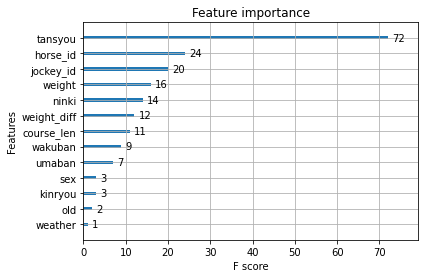

In [10]:

pp = Preprocess(df_2021)
race_data = pp.process()
# tmp = pd.get_dummies(race_data)
x_ = race_data.drop(['rank','date'],axis=1)
y_ = race_data['rank'].map(lambda x: 1 if x<4 else 0)

test_rate = int(0.8*len(x_))
x_train, x_test = x_.iloc[:test_rate],x_.iloc[test_rate:]
y_train, y_test = y_.iloc[:test_rate],y_.iloc[test_rate:]

rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

xgb_model, y_pred = xgb_pred(x_resampled, y_resampled, x_test, y_test)


# Under sampling

In [283]:
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)


---------------------
AUC train: 0.8257839563703017
AUC test : 0.8110263413241493
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      4844
           1       0.42      0.76      0.55      1371

    accuracy                           0.72      6215
   macro avg       0.67      0.73      0.67      6215
weighted avg       0.81      0.72      0.74      6215

        features  importances
13       tansyou     0.440572
14         ninki     0.332357
8      jockey_id     0.025653
9            sex     0.024928
11        weight     0.023968
6   ground_state     0.020356
12   weight_diff     0.018462
1         umaban     0.018376
3     course_len     0.017797
7       horse_id     0.017385
4        weather     0.017315
2        kinryou     0.016755
0        wakuban     0.015099
10           old     0.010978
5      race_type     0.000000


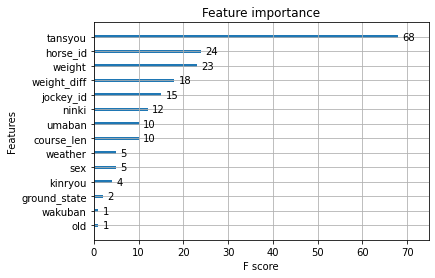

In [284]:

xgb_model, y_pred = xgb_pred(x_resampled, y_resampled, x_test, y_test)
# print('PR-AUC: ', average_precision_score(y_, model.predict(dvalid)))



# Plot AUC

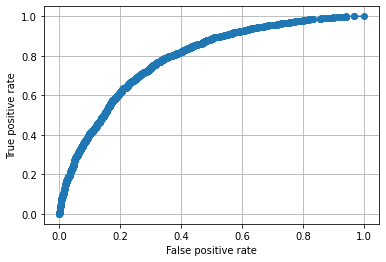

In [69]:
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred)
plt.plot(fpr,tpr,marker='o')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()

In [315]:

xgb_model.predict_proba(x_test.iloc[0:1])
# x_test.iloc[0:1]

array([[0.8100946, 0.1899054]], dtype=float32)

# func eval_proba

In [12]:
def eval_proba(x_test, y_test, xgb_model):
    predict_proba = xgb_model.predict_proba(x_test.astype(float))
    df = pd.DataFrame(columns = ['alpha','score','Up precision','Down precision','Up recall','Down recall','num'])
    j=0
    
    
    for alpha in [0.70,0.80,0.90]:
        acc_dict = {'TU':0,'FU':0,'TD':0,'FD':0}
        for i in range(len(predict_proba)):
            row = predict_proba[i]
            label = np.argmax(row)
            proba = row[label]
            if proba > alpha:
                if y_test[i]==label:
                    if label==0:
                        acc_dict['TD'] += 1
                    else:
                        acc_dict['TU'] += 1
                else:
                    if label==0:
                        acc_dict['FD'] += 1
                    else:
                        acc_dict['FU'] += 1


        denom = 0
        for idx, key in enumerate(acc_dict):
            denom += acc_dict[key]
        if denom==0:continue
            
            
        TU = acc_dict['TU']
        FU = acc_dict['FU']
        TD = acc_dict['TD']
        FD = acc_dict['FD']
        score = (TU + TD)/(denom)
        prec_u = TU/(TU + FU)
        prec_d = TD/(TD + FD)
        recall_u = TU/(TU + FD)
        recall_d = TD/(TD + FU)
        col_list = [alpha,score,prec_u,prec_d,recall_u,recall_d,denom]
        df.loc[j] = col_list
        j+=1
    return df
    

In [286]:
eval_proba(x_test,np.array(y_test),xgb_model)
# xgb_model.predict_proba(x_test.astype(float))
# np.array(y_test)

,alpha,score,Up precision,Down precision,Up recall,Down recall,num
0,0.7,0.820498,0.552941,0.956447,0.865789,0.808081,3532.0
1,0.8,0.879732,0.651361,0.969313,0.892774,0.876357,2087.0
2,0.9,0.941057,0.730769,0.980676,0.876923,0.950820,984.0


# Show XGB constructure

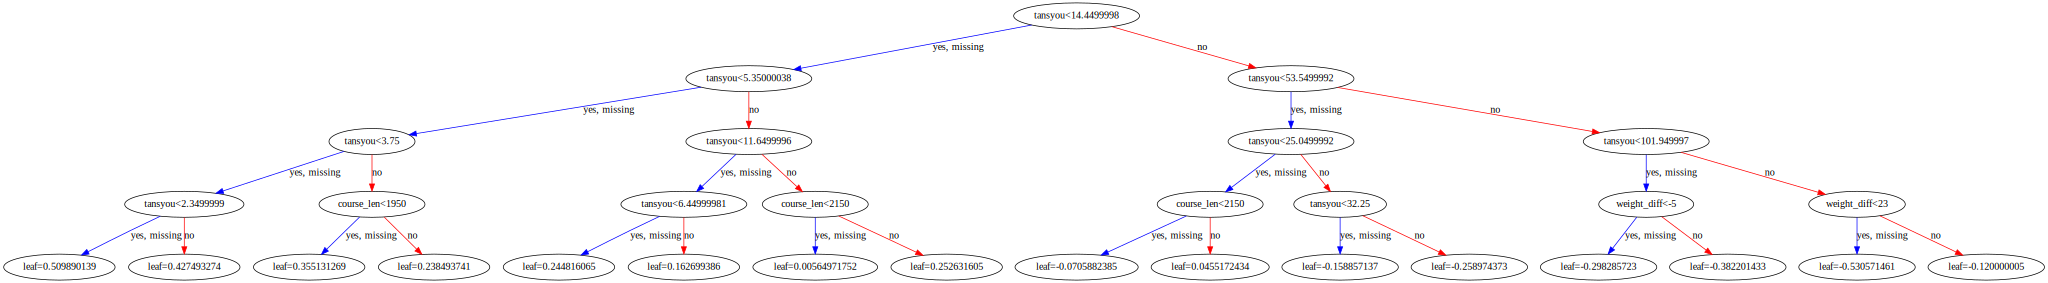

In [246]:
xgb.to_graphviz(xgb_model)# num_trees=[木のインデックス]) 

# PlayGround

In [12]:
pp = Preprocess(df_2021)
results_p = pp.process()

horse_id_list = results_p['horse_id']
horse_results = load_csv(path_2021+'horse_2021.csv')
hr = HorseResults(horse_results)
results_5R = hr.merge_all(results_p, n_samples=5)
results_5R.head()

# learn & predict


# x_ = results_5R.drop(['rank','date'],axis=1)
# y_ = results_5R['rank'].map(lambda x: 1 if x<4 else 0)
# test_rate = int(0.8*len(x_))
# x_train, x_test = x_.iloc[:test_rate],x_.iloc[test_rate:]
# y_train, y_test = y_.iloc[:test_rate],y_.iloc[test_rate:]
# rus = RandomUnderSampler(random_state=0)
# x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
# xgb_model, y_pred = xgb_pred(x_resampled, y_resampled, x_test, y_test)




,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,sex,old,rank,weight,weight_diff,tansyou,ninki,rank_5R,prize_5R
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,2016104451,1170,1,5,7,504,4,16.0,7,3.0,943.12
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,2018102331,1093,1,3,4,462,-4,17.2,6,9.0,0.00
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,2018101178,1154,1,3,3,458,-6,10.7,5,8.0,0.00
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,2018106492,666,1,3,2,472,6,1.7,1,2.0,200.00
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,2018106211,1130,1,3,1,500,2,7.3,4,5.2,81.40


In [37]:
# load return table
return_tables = load_csv(path_2021+'returns_2021.csv')

me = ModelEvaluater(xgb_model,return_tables)
sample = me.calculate_return(x_test)

In [42]:
gain = {}
for threshold in [0.5,0.6,0.7,0.8,0.9]:
    gain[threshold] = me.calculate_return(x_test, threshold)
gain

{0.5: -47580, 0.6: -36010, 0.7: -20920, 0.8: -6770, 0.9: -1260}

In [47]:
results_5R['horse_id'].nunique()
results_m = results_5R
results_m['horse_id'].astype('category')

202106010111    2016104451
202107010101    2018102331
202107010101    2018101178
202107010101    2018106492
202107010101    2018106211
                   ...    
202104040408    2018100545
202104040408    2017101556
202104040408    2018104628
202104040409    2017106172
202110040412    2017102889
Name: horse_id, Length: 31074, dtype: category
Categories (9129, int64): [2010101667, 2011100643, 2011101125, 2011101727, ..., 2019110104, 2019110105, 2019110107, 2019110111]

In [51]:
results_m['horse_id'] = results_m['horse_id'].astype('category')

In [53]:
results_m

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,sex,old,rank,weight,weight_diff,tansyou,ninki,rank_5R,prize_5R
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,1736,1170,1,5,7,504,4,16.0,7,3.0,943.12
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,5017,1093,1,3,4,462,-4,17.2,6,9.0,0.00
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,4372,1154,1,3,3,458,-6,10.7,5,8.0,0.00
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,7621,666,1,3,2,472,6,1.7,1,2.0,200.00
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,7442,1130,1,3,1,500,2,7.3,4,5.2,81.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202104040408,7,8,54.0,2400,3,0,1,2021-08-22,4023,1122,1,3,6,474,0,7.2,3,4.6,295.40
202104040408,7,9,54.0,2400,3,0,1,2021-08-22,2480,1183,1,4,5,488,4,38.6,8,8.4,32.00
202104040408,6,7,54.0,2400,3,0,1,2021-08-22,6337,1171,1,3,4,478,10,16.7,6,5.6,132.66
202104040409,1,2,55.0,1000,3,0,1,2021-08-22,3541,1077,0,4,11,408,-4,22.7,7,7.4,120.00


---------------------
AUC train: 0.8299699075879623
AUC test : 0.7939616095106792
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      4844
           1       0.41      0.74      0.53      1371

    accuracy                           0.71      6215
   macro avg       0.66      0.72      0.66      6215
weighted avg       0.80      0.71      0.73      6215

        features  importances
13       tansyou     0.604267
14         ninki     0.082565
16      prize_5R     0.032777
2        kinryou     0.032716
9            sex     0.029088
7       horse_id     0.028517
8      jockey_id     0.025518
3     course_len     0.025223
6   ground_state     0.023667
1         umaban     0.023636
15       rank_5R     0.023201
11        weight     0.023084
12   weight_diff     0.020907
0        wakuban     0.019820
4        weather     0.005016
5      race_type     0.000000
10           old     0.000000


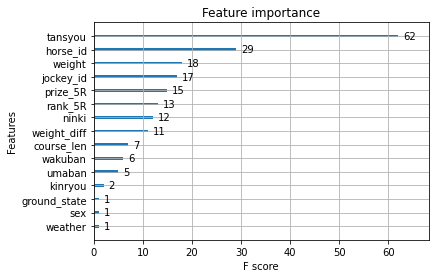

In [54]:
x_ = results_m.drop(['rank','date'],axis=1)
y_ = results_m['rank'].map(lambda x: 1 if x<4 else 0)
test_rate = int(0.8*len(x_))
x_train, x_test = x_.iloc[:test_rate],x_.iloc[test_rate:]
y_train, y_test = y_.iloc[:test_rate],y_.iloc[test_rate:]
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
xgb_model, y_pred = xgb_pred(x_resampled, y_resampled, x_test, y_test)

In [56]:
peds

,peds_0,peds_1,peds_2,peds_3,peds_4,peds_5,peds_6,peds_7,peds_8,peds_9,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
2018105875,ダイワメジャー 2001 栗毛 [血統][産駒] Halo系,カシュカシュ 2009 鹿毛 [血統][産駒] FNo.[1-k],サンデーサイレンス Sunday Silence(米) 1986 青鹿毛 [血統][産駒],スカーレットブーケ 1988 栗毛 [血統][産駒],アフリート Afleet(加) 1984 栗毛 [血統][産駒],スリーソウツ Three Thoughts(米) 1992 鹿毛 [血統][産駒],Halo 1969 黒鹿毛 [血統][産駒],Wishing Well 1975 鹿毛 [血統][産駒],ノーザンテースト Northern Taste(加) 1971 栗毛 [血統][産駒],スカーレットインク Scarlet Ink(米) 1971 栗毛 [血統][産駒],...,Green Ticket,Ways to Learn,Turn-to,Nothirdchance,Cosmic Bomb,Almahmoud,Bold Ruler,Somethingroyal,Lyphard,Three Roses
2018105258,エピファネイア 2010 鹿毛 [血統][産駒] Roberto系,ペルレンケッテ 2008 鹿毛 [血統][産駒] FNo.[4-n],シンボリクリスエス 1999 黒鹿毛 [血統][産駒],シーザリオ 2002 青毛 [血統][産駒],ディープインパクト 2002 鹿毛 [血統][産駒],プンティラ Puntilla(独) 1997 黒鹿毛 [血統][産駒],Kris S. 1977 黒鹿毛 [血統][産駒],Tee Kay 1991 黒鹿毛 [血統][産駒],スペシャルウィーク 1995 黒鹿毛 [血統][産駒],キロフプリミエール Kirov Premiere(英) 1990 鹿毛 [血統][産駒],...,Busted,Highclere,Literat,Surama,Aggressor,Raven Locks,イルドブルボン,Liranga,Abary,Pedra
2018101134,ミッキーアイル 2011 鹿毛 [血統][産駒] Halo系,ザッハトルテ 2007 芦毛 [血統][産駒] FNo.[7-a],ディープインパクト 2002 鹿毛 [血統][産駒],スターアイル 2004 鹿毛 [血統][産駒],クロフネ 1998 芦毛 [血統][産駒],パフェ Parfait(米) 1996 鹿毛 [血統][産駒],サンデーサイレンス Sunday Silence(米) 1986 青鹿毛 [血統][産駒],ウインドインハーヘア Wind in Her Hair(愛) 1991 鹿毛 [血統][産駒],ロックオブジブラルタル 1999 鹿毛 [血統][産駒],アイルドフランス Isle de France(米) 1995 鹿毛 [血統][産駒],...,Icecapade,コレラ,Raise a Native,Gold Digger,Nureyev,Pasadoble,Prince John,Prayer Bell,Nashua,Cream Pie
2018102791,Kingman (英) 2011 鹿毛 [血統][産駒] Danzig系,ドゥケシーナ Duchessina(米) 2013 鹿毛 [血統][産駒] FNo.[2-d],Invincible Spirit (愛) 1997 鹿毛 [血統][産駒],Zenda 1999 鹿毛 [血統][産駒],Henrythenavigator 2005 黒鹿毛 [血統][産駒],Dreamlike 1997 鹿毛 [血統][産駒],Green Desert 1983 鹿毛 [血統][産駒],Rafha 1987 鹿毛 [血統][産駒],Zamindar 1994 鹿毛 [血統][産駒],Hope 1991 鹿毛 [血統][産駒],...,Irish River,Luv Luvin',Northern Dancer,South Ocean,Secretariat,Crimson Saint,Exclusive Native,Won't Tell You,Nijinsky,La Dame Du Lac
2018101539,カレンブラックヒル 2009 黒鹿毛 [血統][産駒] Halo系,ヒシシャトル 2005 鹿毛 [血統][産駒] FNo.[7-f],ダイワメジャー 2001 栗毛 [血統][産駒],チャールストンハーバー Charleston Harbor(米) 1998 鹿毛 [血統][産駒],ボストンハーバー Boston Harbor(米) 1994 鹿毛 [血統][産駒],ヒシレイホウ 1995 黒鹿毛 [血統][産駒],サンデーサイレンス Sunday Silence(米) 1986 青鹿毛 [血統][産駒],スカーレットブーケ 1988 栗毛 [血統][産駒],Grindstone 1993 黒鹿毛 [血統][産駒],Penny's Valentine 1989 栗毛 [血統][産駒],...,Restless Wind,Dors,Northern Dancer,Pas de Nom,Mr. Prospector,Stick to Beauty,Nearctic,Seximee,ポリック,Brabantia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019106195,ダイワメジャー 2001 栗毛 [血統][産駒] Halo系,ミネルバサウンド 2003 鹿毛 [血統][産駒] FNo.[3-n],サンデーサイレンス Sunday Silence(米) 1986 青鹿毛 [血統][産駒],スカーレットブーケ 1988 栗毛 [血統][産駒],ブライアンズタイム Brian's Time(米) 1985 黒鹿毛 [血統][産駒],シンメイミネルバ 1997 黒鹿毛 [血統][産駒],Halo 1969 黒鹿毛 [血統][産駒],Wishing Well 1975 鹿毛 [血統][産駒],ノーザンテースト Northern Taste(加) 1971 栗毛 [血統][産駒],スカーレットインク Scarlet Ink(米) 1971 栗毛 [血統][産駒],...,Hasty Road,Sunny Vale,Northern Dancer,Flaming Page,Round Table,Regal Gleam,Mr. Prospector,プレイメイト,Danzig,Cold Hearted
2019100582,アジアエクスプレス 2011 栗毛 [血統][産駒] Storm Bird系,ブリトマルティス 2004 鹿毛 [血統][産駒] FNo.[21-a],ヘニーヒューズ Henny Hughes(米) 2003 [血統][産駒],ランニングボブキャッツ 2002 [血統][産駒],スペシャルウィーク 1995 黒鹿毛 [血統][産駒],アマートベン 1995 鹿毛 [血統][産駒],ヘネシー Hennessy(米) 1993 栗毛 [血統][産駒],Meadow Flyer 1989 鹿毛 [血統][産駒],Running Stag 1994 鹿毛 [血統][産駒],Backatem 1997 鹿毛 [血統][産駒],...,セントクレスピン,ミスアシヤガワ,ノーザンテースト,クリアアンバー,メジロサンマン,シエリル,Cyane,Smartaire,Hail to Reason,Lucky Ole Me
2019101640,ダイワメジャー 2001 栗毛 [血統][産駒] Halo系,タミーン Tameen(英) 2008 鹿毛 [血統][産駒] FNo.[4-m],サンデーサイレンス Sunday Silence(米) 1986 青鹿毛 [血統][産駒],スカーレットブーケ 1988 栗毛 [血統][産駒],Shirocco 2001 鹿毛 [血統][産駒],Najah 1998 鹿毛 [血統][産駒],Halo 1969 黒鹿毛 [血統][産駒],Wishing Well 1975 鹿毛 [血統][産駒],ノーザンテースト Northern Taste(加) 1971 栗毛 [血統][産駒],スカーレットインク Scarlet Ink(米) 1971 栗毛 [血統][産駒],...,タップオンウッド,Pendulina,Red God,Runaway Bride,Bustino,Highclere,Northern Dancer,Special,Exclusive Native,Fall Aspen
2019100251,ワールドエース 2009 鹿毛 [血統][産駒] Halo系,ルナツー 2012 鹿毛 [血統][産駒] FNo.[4-r],ディープインパクト 2002 鹿毛 [血統][産駒],マンデラ Mandela(独) 2000 栗毛 

In [74]:
results_m = results_5R.merge(peds, left_on='horse_id',right_index=True,how='left')
results_m

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,2016104451,1170,...,Blakeney,The Dancer,Hail to Reason,Cosmah,Understanding,Mountain Flower,Northern Dancer,Lady Victoria,ガーサント,パロクサイド
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,2018102331,1093,...,Tri Jet,Hail Proudly,Hail to Reason,Cosmah,Understanding,Mountain Flower,Never Bend,River Lady,Ribot,Rajput Princess
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,2018101178,1154,...,Icecapade,コレラ,Raise a Native,Gold Digger,Venetian Jester,Friendly Ways,Raise a Native,Sweet Tooth,King of the Tudors,Countess Fleet
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,2018106492,666,...,リマンド,イコマエイカン,Halo,Ballade,Caerleon,Muffitys,Northern Dancer,Victoria Regina,Damascus,Pass all Flags
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,2018106211,1130,...,リマンド,イコマエイカン,Northern Dancer,Goofed,Drone,Olmec,Sharpen Up,Ballinderry,Northern Dancer,Ballade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202104040408,7,8,54.0,2400,3,0,1,2021-08-22,2018100545,1122,...,セントクレスピン,ミスアシヤガワ,Northern Dancer,Pas de Nom,Sir Ivor,Courtly Dee,Kalamoun,Belle of Ireland,ターゴワイス,Alace
202104040408,7,9,54.0,2400,3,0,1,2021-08-22,2017101556,1183,...,トニービン,シヤダイマイン,Mr. Prospector,プレイメイト,Zulu Tom,Pro Tab,トウショウボーイ,シービークイン,Lyphard,My Bupers
202104040408,6,7,54.0,2400,3,0,1,2021-08-22,2018104628,1171,...,Darshaan,Azaarika,Nebbiolo,Clariden,Lord Gayle,Deirdre,Kris,Sweetly,Reform,Stardom
202104040409,1,2,55.0,1000,3,0,1,2021-08-22,2017106172,1077,...,Thatch,Contrail,Raise a Native,Gold Digger,Forli,Moccasin,Habitat,Garvey Girl,ムーティエ,コダマクイン


In [173]:
results_m

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,2016104451,1170,...,Blakeney,The Dancer,Hail to Reason,Cosmah,Understanding,Mountain Flower,Northern Dancer,Lady Victoria,ガーサント,パロクサイド
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,2018102331,1093,...,Tri Jet,Hail Proudly,Hail to Reason,Cosmah,Understanding,Mountain Flower,Never Bend,River Lady,Ribot,Rajput Princess
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,2018101178,1154,...,Icecapade,コレラ,Raise a Native,Gold Digger,Venetian Jester,Friendly Ways,Raise a Native,Sweet Tooth,King of the Tudors,Countess Fleet
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,2018106492,666,...,リマンド,イコマエイカン,Halo,Ballade,Caerleon,Muffitys,Northern Dancer,Victoria Regina,Damascus,Pass all Flags
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,2018106211,1130,...,リマンド,イコマエイカン,Northern Dancer,Goofed,Drone,Olmec,Sharpen Up,Ballinderry,Northern Dancer,Ballade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202104040408,7,8,54.0,2400,3,0,1,2021-08-22,2018100545,1122,...,セントクレスピン,ミスアシヤガワ,Northern Dancer,Pas de Nom,Sir Ivor,Courtly Dee,Kalamoun,Belle of Ireland,ターゴワイス,Alace
202104040408,7,9,54.0,2400,3,0,1,2021-08-22,2017101556,1183,...,トニービン,シヤダイマイン,Mr. Prospector,プレイメイト,Zulu Tom,Pro Tab,トウショウボーイ,シービークイン,Lyphard,My Bupers
202104040408,6,7,54.0,2400,3,0,1,2021-08-22,2018104628,1171,...,Darshaan,Azaarika,Nebbiolo,Clariden,Lord Gayle,Deirdre,Kris,Sweetly,Reform,Stardom
202104040409,1,2,55.0,1000,3,0,1,2021-08-22,2017106172,1077,...,Thatch,Contrail,Raise a Native,Gold Digger,Forli,Moccasin,Habitat,Garvey Girl,ムーティエ,コダマクイン


In [67]:
categorical_columns = ['horse_id'] + list(peds.columns)
categorical_columns

['horse_id',
 'peds_0',
 'peds_1',
 'peds_2',
 'peds_3',
 'peds_4',
 'peds_5',
 'peds_6',
 'peds_7',
 'peds_8',
 'peds_9',
 'peds_10',
 'peds_11',
 'peds_12',
 'peds_13',
 'peds_14',
 'peds_15',
 'peds_16',
 'peds_17',
 'peds_18',
 'peds_19',
 'peds_20',
 'peds_21',
 'peds_22',
 'peds_23',
 'peds_24',
 'peds_25',
 'peds_26',
 'peds_27',
 'peds_28',
 'peds_29',
 'peds_30',
 'peds_31',
 'peds_32',
 'peds_33',
 'peds_34',
 'peds_35',
 'peds_36',
 'peds_37',
 'peds_38',
 'peds_39',
 'peds_40',
 'peds_41',
 'peds_42',
 'peds_43',
 'peds_44',
 'peds_45',
 'peds_46',
 'peds_47',
 'peds_48',
 'peds_49',
 'peds_50',
 'peds_51',
 'peds_52',
 'peds_53',
 'peds_54',
 'peds_55',
 'peds_56',
 'peds_57',
 'peds_58',
 'peds_59',
 'peds_60',
 'peds_61']

In [69]:
results_m

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,1736,1170,...,27,584,61,52,421,485,260,504,1011,2778
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,5017,1093,...,337,233,61,52,421,485,249,788,681,1728
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,4372,1154,...,140,645,119,108,427,270,298,946,434,446
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,7621,666,...,422,635,62,14,67,489,260,1009,201,1553
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,7442,1130,...,422,635,106,111,125,526,333,73,574,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202104040408,7,8,54.0,2400,3,0,1,2021-08-22,4023,1122,...,384,676,106,233,369,165,182,94,1091,25
202104040408,7,9,54.0,2400,3,0,1,2021-08-22,2480,1183,...,395,652,94,367,446,585,460,1074,482,1397
202104040408,6,7,54.0,2400,3,0,1,2021-08-22,6337,1171,...,78,36,102,46,222,185,194,947,666,2041
202104040409,1,2,55.0,1000,3,0,1,2021-08-22,3541,1077,...,323,114,119,108,145,476,146,340,1224,2508


In [72]:
for column in categorical_columns:
    results_m[column] = results_m[column].astype('category')
results_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31074 entries, 202106010111 to 202110040412
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   wakuban       31074 non-null  int64         
 1   umaban        31074 non-null  int64         
 2   kinryou       31074 non-null  float64       
 3   course_len    31074 non-null  int64         
 4   weather       31074 non-null  int64         
 5   race_type     31074 non-null  int64         
 6   ground_state  31074 non-null  int64         
 7   date          31074 non-null  datetime64[ns]
 8   horse_id      31074 non-null  category      
 9   jockey_id     31074 non-null  int64         
 10  sex           31074 non-null  int64         
 11  old           31074 non-null  int64         
 12  rank          31074 non-null  int64         
 13  weight        31074 non-null  int64         
 14  weight_diff   31074 non-null  int64         
 15  tansyou       3107

# カテゴリ化してないデータあるよ

In [73]:
def process_category(df, target_columns):
    df2 = df.copy()
    for column in target_columns:
        df2[column] = LabelEncoder().fit_transform(df2[column].fillna('Na'))
        
#      get dummy
    for column in target_columns:
        df2[column] = df2[column].astype('category')

    return df2

In [77]:
results_d = process_category(results_m, categorical_columns)

In [78]:
results_d

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,1736,1170,...,27,584,61,52,421,485,260,504,1011,2778
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,5017,1093,...,337,233,61,52,421,485,249,788,681,1728
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,4372,1154,...,140,645,119,108,427,270,298,946,434,446
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,7621,666,...,422,635,62,14,67,489,260,1009,201,1553
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,7442,1130,...,422,635,106,111,125,526,333,73,574,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202104040408,7,8,54.0,2400,3,0,1,2021-08-22,4023,1122,...,384,676,106,233,369,165,182,94,1091,25
202104040408,7,9,54.0,2400,3,0,1,2021-08-22,2480,1183,...,395,652,94,367,446,585,460,1074,482,1397
202104040408,6,7,54.0,2400,3,0,1,2021-08-22,6337,1171,...,78,36,102,46,222,185,194,947,666,2041
202104040409,1,2,55.0,1000,3,0,1,2021-08-22,3541,1077,...,323,114,119,108,145,476,146,340,1224,2508


In [169]:
def gain(return_func, x_, n_samples=100,lower=50,min_threshold=0.5):
    gain = {}
    for i in range(n_samples):
        threshold = 1 * (i/n_samples) + min_threshold *(1-i/n_samples)
        n_bets, money = return_func(x_, threshold)
        if n_bets > lower:
            gain[n_bets] = (n_bets * 100 + money)/(n_bets*100)
    return pd.Series(gain)

In [170]:
me = ModelEvaluater(model=xgb_model,return_tables=return_tables)
gain_1 = gain(me.fukusho_return ,x_test)

In [171]:
gain_tansho = gain(me.tansho_return,x_test)

<AxesSubplot:>

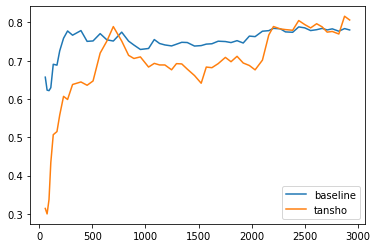

In [172]:
gain_1.rename('baseline').plot(legend=True)
gain_tansho.rename('tansho').plot(legend=True)

In [178]:
results_5R
horse_results
results_m = results_5R
results_m = hr.merge_all(results_m,n_samples=9)
results_m = hr.merge_all(results_m,n_samples='all')


In [180]:
results_m = results_m.merge(peds, left_on='horse_id',right_index=True,how='left')
results_m.head()

,wakuban,umaban,kinryou,course_len,weather,race_type,ground_state,date,horse_id,jockey_id,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
202106010111,7,13,54.0,2000,2,0,0,2021-01-05,2016104451,1170,...,Blakeney,The Dancer,Hail to Reason,Cosmah,Understanding,Mountain Flower,Northern Dancer,Lady Victoria,ガーサント,パロクサイド
202107010101,6,7,56.0,1800,2,1,0,2021-01-05,2018102331,1093,...,Tri Jet,Hail Proudly,Hail to Reason,Cosmah,Understanding,Mountain Flower,Never Bend,River Lady,Ribot,Rajput Princess
202107010101,5,5,56.0,1800,2,1,0,2021-01-05,2018101178,1154,...,Icecapade,コレラ,Raise a Native,Gold Digger,Venetian Jester,Friendly Ways,Raise a Native,Sweet Tooth,King of the Tudors,Countess Fleet
202107010101,7,8,56.0,1800,2,1,0,2021-01-05,2018106492,666,...,リマンド,イコマエイカン,Halo,Ballade,Caerleon,Muffitys,Northern Dancer,Victoria Regina,Damascus,Pass all Flags
202107010101,6,6,56.0,1800,2,1,0,2021-01-05,2018106211,1130,...,リマンド,イコマエイカン,Northern Dancer,Goofed,Drone,Olmec,Sharpen Up,Ballinderry,Northern Dancer,Ballade


In [183]:
categorical_columns = ['horse_id'] + list(peds.columns)
results_d = process_category(results_m, categorical_columns)

---------------------
AUC train: 0.7696188759207916
AUC test : 0.691294425461714
              precision    recall  f1-score   support

           0       0.87      0.58      0.70      4844
           1       0.32      0.70      0.44      1371

    accuracy                           0.61      6215
   macro avg       0.60      0.64      0.57      6215
weighted avg       0.75      0.61      0.64      6215

       features  importances
13      rank_5R     0.199612
15      rank_9R     0.067691
14     prize_5R     0.042503
17    rank_allR     0.031094
18   prize_allR     0.025240
12  weight_diff     0.021515
75      peds_56     0.020674
62      peds_43     0.019690
7      horse_id     0.019158
55      peds_36     0.018501
11       weight     0.018191
27       peds_8     0.017895
64      peds_45     0.017019
37      peds_18     0.016914
43      peds_24     0.015812
3    course_len     0.015766
72      peds_53     0.015538
29      peds_10     0.015367
0       wakuban     0.015354
71      peds

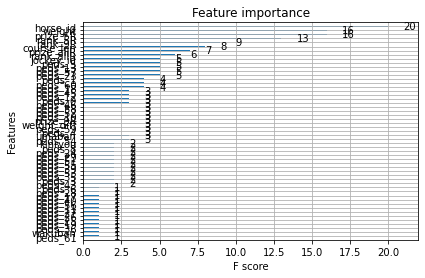

In [188]:
x_ = results_d.drop(['rank','date','tansyou','ninki'],axis=1)
y_ = results_d['rank'].map(lambda x: 1 if x<4 else 0)
test_rate = int(0.8*len(x_))
x_train, x_test = x_.iloc[:test_rate],x_.iloc[test_rate:]
y_train, y_test = y_.iloc[:test_rate],y_.iloc[test_rate:]
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
xgb_model, y_pred = xgb_pred(x_resampled, y_resampled, x_test, y_test)

In [215]:
me = ModelEvaluater(model=xgb_model,return_tables=return_tables,std=True)


In [216]:
gain_std = gain(me.tansho_return ,x_test)

<AxesSubplot:>

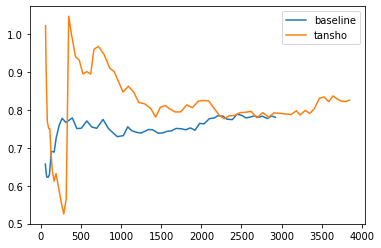

In [217]:
gain_1.rename('baseline').plot(legend=True)
gain_std.rename('tansho').plot(legend=True)

In [223]:
gain_std

3848    0.826014
3796    0.821786
3742    0.823410
3688    0.829338
3642    0.836958
          ...   
112     0.750000
99      0.750505
81      0.769136
67      0.900000
59      1.022034
Length: 71, dtype: float64

In [2]:
7790 * 6

46740